# Table of Content
01. Import Libraries
02. Import Data
03. Flat Type
04. Flat Model
05. Interchange Flag
06. Takeaway

# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Adjust setting to allow seeing all the rows in the output of this notebook
pd.options.display.max_rows = None

In [3]:
# Adjust setting to allow seeing all the columns in the output of this notebook
pd.options.display.max_columns = None

In [4]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

# 02. Import Data

In [5]:
# Define the main project folder path
path = r'C:\Users\saich\Desktop\CareerFoundry\Data Immersion\Achievement 6 Advanced Analytics & Dashboard Design\11-2023 HDB Flat Resale Analysis'

In [6]:
# Import 'flat_resale_all_w_cpi (geodata).pkl' from 'Prepared Data' folder
flat_resale = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'flat_resale_all_clustered (geodata).pkl'))

In [7]:
flat_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,row_id,address,latitude,longitude,geometry,nearest_station,station_distance,station_opening,station_closure,cpi_all_items,adjusted_resale_price,region,interchange_flag,storey_range_midpoint,adj_resale_price_category,clusters,cluster
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,86,0,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,14516.129032,North East,normal station,11,Low price,0,blue
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,86,1,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,5,Low price,0,blue
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,86,2,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,12903.225806,North East,normal station,11,Low price,0,blue
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,86,3,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,8,Low price,0,blue
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,85,4,216 ANG MO KIO AVE 1,1.366197,103.841505,POINT (28911.052 38692.617),Ang Mo Kio MRT Station (NS16),986.842379,1987-11-07,NaT,62.0,76129.032258,North East,normal station,5,Low price,0,blue


In [8]:
flat_resale.shape

(915371, 28)

# 03. Flat Type

### 03.1 Which flat type has the most resale transaction counts

In [9]:
flat_type_count = flat_resale.groupby('flat_type').agg(count=('adjusted_resale_price', 'count'))
flat_type_count.sort_values('count', ascending=False, inplace=True)
flat_type_count

,count
flat_type,
4 ROOM,347298
3 ROOM,293090
5 ROOM,192726
EXECUTIVE,68928
2 ROOM,11490
1 ROOM,1300
MULTI-GENERATION,539


[Text(0.5, 1.0, 'Percentage of Resales across Flat Types')]

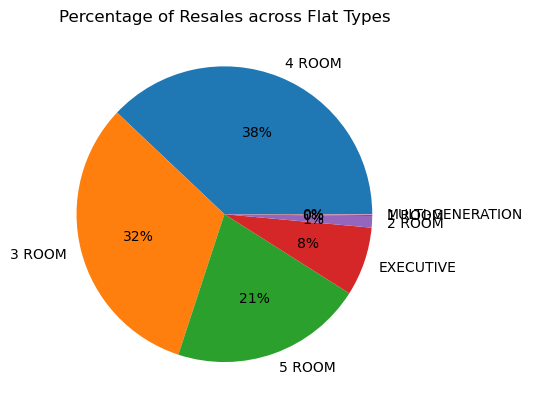

In [10]:
pie_flat_type = flat_type_count.plot.pie(y='count', ylabel='', legend=False, autopct='%.0f%%')
pie_flat_type.set(title='Percentage of Resales across Flat Types')

In [11]:
# Export 'pie_flat_type'
pie_flat_type.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_flat_type.png'), bbox_inches='tight')

<b><u>Interpretation: </u></b><br>
4 room and 3 room are the top 2 most common flat types in flat resale market.

### 03.2 Which flat type has the highest resale price in average

In [12]:
flat_type_adj_resale_price_mean = flat_resale.groupby('flat_type').agg(adjusted_resale_price_mean=('adjusted_resale_price', 'mean'))
flat_type_adj_resale_price_mean.sort_values('adjusted_resale_price_mean', ascending=False, inplace=True)
flat_type_adj_resale_price_mean

,adjusted_resale_price_mean
flat_type,
MULTI-GENERATION,655483.302943
EXECUTIVE,602614.352609
5 ROOM,492915.565626
4 ROOM,373181.888571
3 ROOM,236274.788252
2 ROOM,168210.070470
1 ROOM,80982.895186


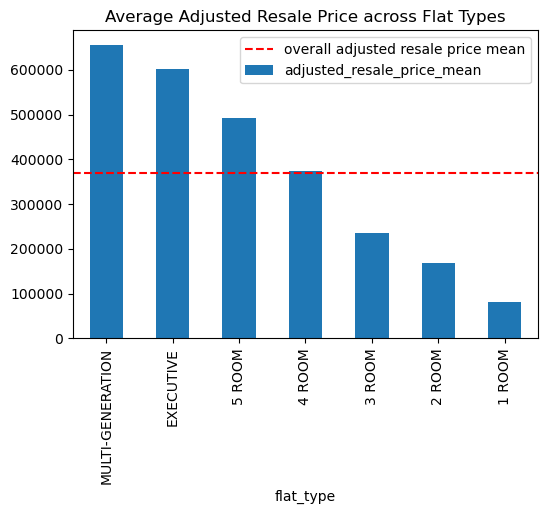

In [13]:
bar_price_vs_flat_type = flat_type_adj_resale_price_mean.plot.bar(figsize=(6, 4))
plt.axhline(y=flat_resale['adjusted_resale_price'].mean(), color='red', linestyle='--', 
            label='overall adjusted resale price mean')
plt.title('Average Adjusted Resale Price across Flat Types')
plt.legend()

In [14]:
# Export 'bar_price_vs_flat_type'
bar_price_vs_flat_type.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_vs_flat_type.png'), 
                                      bbox_inches='tight')

<b><u>Interpretation: </u></b><br>
From the bar chart above, multi-generation has the highest average adjusted resale price, while 1 room has the lowest average adjusted resale price. The most transacted flat types (4 room and 3 room) have their average adjusted resale price around and below the overall market average respectively. 

Multi-generation and executive flat types have the highest average adjusted resale price. 

Besides, it seems like the flat type does have some relationship with floor area, because the average adjusted resale price increases as the number of rooms increases. Let's check the average floor area of each flat type.

### 03.3 Compare the floor area of each flat type in average

In [15]:
flat_type_group = flat_resale.groupby('flat_type').agg(adjusted_resale_price_mean=('adjusted_resale_price', 'mean'), 
                                                       floor_area_mean=('floor_area_sqm', 'mean'))
flat_type_group.sort_values('adjusted_resale_price_mean', ascending=False, inplace=True)
flat_type_group.reset_index(inplace=True)
flat_type_group

,flat_type,adjusted_resale_price_mean,floor_area_mean
0,MULTI-GENERATION,655483.302943,161.656772
1,EXECUTIVE,602614.352609,146.745189
2,5 ROOM,492915.565626,120.757594
3,4 ROOM,373181.888571,96.507450
4,3 ROOM,236274.788252,68.387797
5,2 ROOM,168210.070470,45.418468
6,1 ROOM,80982.895186,30.277692


C:\Users\saich\AppData\Local\Temp\ipykernel_2576\3297185782.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_price_vs_floor_area_vs_flat_type.set_xticklabels(bar_price_vs_floor_area_vs_flat_type.get_xticklabels(), rotation = 90)


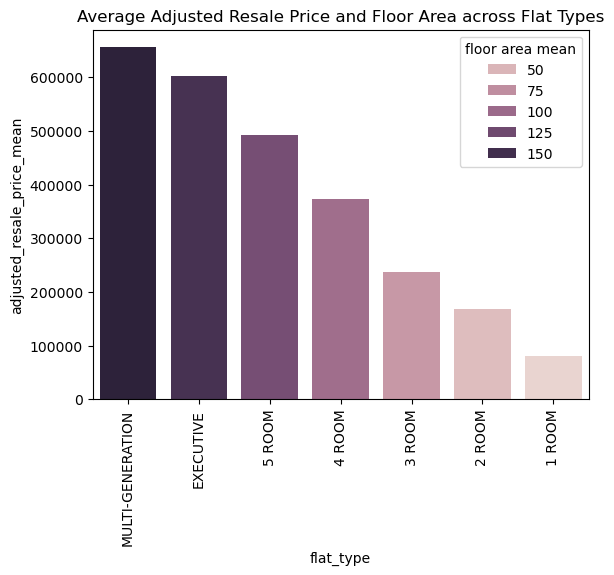

In [16]:
bar_price_vs_floor_area_vs_flat_type = sns.barplot(data=flat_type_group, x='flat_type', y='adjusted_resale_price_mean', 
                                                   hue='floor_area_mean')
bar_price_vs_floor_area_vs_flat_type.set_xticklabels(bar_price_vs_floor_area_vs_flat_type.get_xticklabels(), rotation = 90)
bar_price_vs_floor_area_vs_flat_type.set(title='Average Adjusted Resale Price and Floor Area across Flat Types')
bar_price_vs_floor_area_vs_flat_type.legend(title='floor area mean')

In [17]:
# Export 'bar_price_vs_floor_area_vs_flat_type'
bar_price_vs_floor_area_vs_flat_type.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_vs_floor_area_vs_flat_type.png'), 
                                                    bbox_inches='tight')

<b><u>Interpretation: </u></b><br>
From the bar chart above, as the average adjusted resale price goes higher, the color of the bar gets darker, meaning the floor area average gets larger. Thus, it again aligns with the hypothesis which the larger floor area comes with higher adjusted resale price. 

# 04. Flat Model

### 04.1 Which flat model has the most resale transaction counts

In [18]:
flat_model_count = flat_resale.groupby('flat_model').agg(count=('adjusted_resale_price', 'count'))
flat_model_count.sort_values('count', ascending=False, inplace=True)
flat_model_count

,count
flat_model,
Model A,260407
Improved,239037
New Generation,187619
Simplified,57140
Premium Apartment,45603
Standard,42282
Apartment,35119
Maisonette,29362
Model A2,10008


[Text(0.5, 1.0, 'Percentage of Resales across Flat Models')]

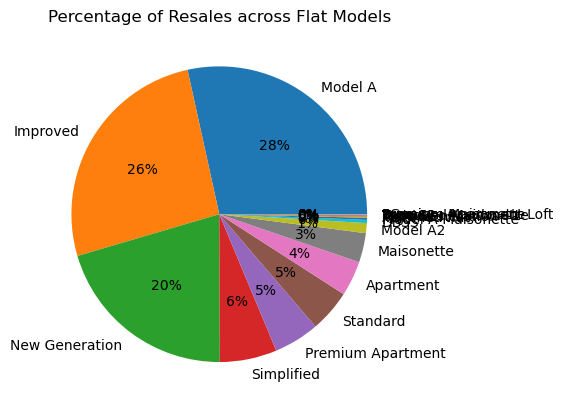

In [19]:
pie_flat_model = flat_model_count.plot.pie(y='count', ylabel='', legend=False, autopct='%.0f%%')
pie_flat_model.set(title='Percentage of Resales across Flat Models')

In [20]:
# Export 'pie_flat_model'
pie_flat_model.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_flat_model.png'), bbox_inches='tight')

<b><u>Interpretation: </u></b><br>
Model A, Improved, and New Generation are the top 3 most common flat models in flat resale market.

### 04.2 Which flat model has the highest resale price in average

In [21]:
flat_model_adj_resale_price_mean = flat_resale.groupby('flat_model').agg(adjusted_resale_price_mean=('adjusted_resale_price', 'mean'))
flat_model_adj_resale_price_mean.sort_values('adjusted_resale_price_mean', ascending=False, inplace=True)
flat_model_adj_resale_price_mean

,adjusted_resale_price_mean
flat_model,
Type S2,1.058466e+06
Type S1,9.411309e+05
Premium Apartment Loft,9.157169e+05
DBSS,7.444123e+05
Premium Maisonette,7.229007e+05
Multi Generation,6.554833e+05
3Gen,6.434304e+05
Terrace,6.244254e+05
Maisonette,6.082058e+05


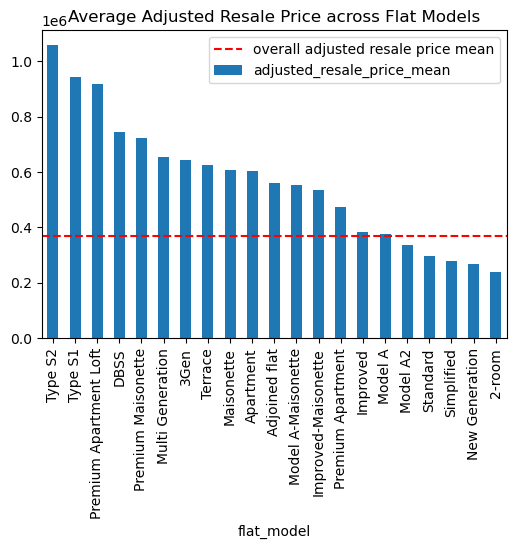

In [22]:
bar_price_vs_flat_model = flat_model_adj_resale_price_mean.plot.bar(figsize=(6, 4))
plt.axhline(y=flat_resale['adjusted_resale_price'].mean(), color='red', linestyle='--', 
            label='overall adjusted resale price mean')
plt.title('Average Adjusted Resale Price across Flat Models')
plt.legend()

In [23]:
# Export 'bar_price_vs_flat_model'
bar_price_vs_flat_model.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_vs_flat_model.png'), 
                                       bbox_inches='tight')

<b><u>Interpretation: </u></b><br>
From the bar chart above, Type S2 has the highest average adjusted resale price, while 2-room has the lowest average adjusted resale price. Two of the most resold flat models (Model A and Improved) have their average adjusted resale price around the overall market average, while the other one (New Generation) is below the overall market average. 

Let's take a look at the average floor area of each flat model. 

### 04.3 Compare the floor area of each flat model in average

In [24]:
flat_model_group = flat_resale.groupby('flat_model').agg(adjusted_resale_price_mean=('adjusted_resale_price', 'mean'), 
                                                         floor_area_mean = ('floor_area_sqm', 'mean'))
flat_model_group.sort_values('adjusted_resale_price_mean', ascending=False, inplace=True)
flat_model_group.reset_index(inplace=True)
flat_model_group

,flat_model,adjusted_resale_price_mean,floor_area_mean
0,Type S2,1.058466e+06,106.132075
1,Type S1,9.411309e+05,94.297674
2,Premium Apartment Loft,9.157169e+05,108.230769
3,DBSS,7.444123e+05,96.730697
4,Premium Maisonette,7.229007e+05,161.779070
5,Multi Generation,6.554833e+05,161.656772
6,3Gen,6.434304e+05,120.307692
7,Terrace,6.244254e+05,119.519186
8,Maisonette,6.082058e+05,148.335958
9,Apartment,6.017389e+05,146.612404


C:\Users\saich\AppData\Local\Temp\ipykernel_2576\2799593231.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_price_vs_floor_area_vs_flat_model.set_xticklabels(bar_price_vs_floor_area_vs_flat_model.get_xticklabels(), rotation = 90)


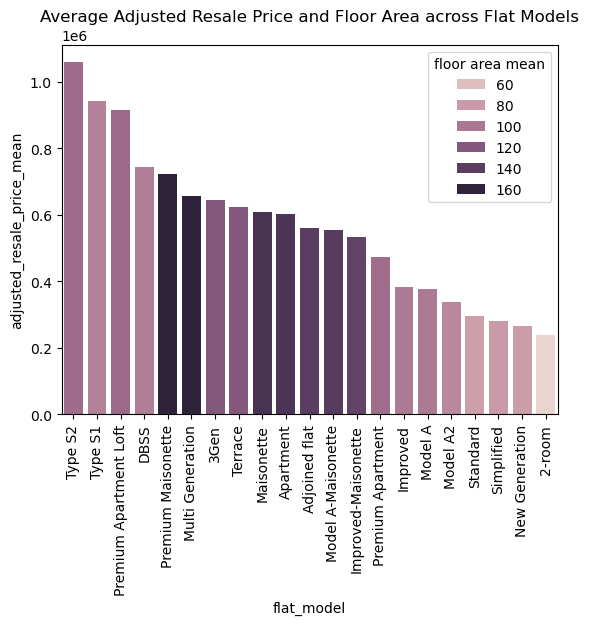

In [25]:
bar_price_vs_floor_area_vs_flat_model = sns.barplot(data=flat_model_group, x='flat_model', y='adjusted_resale_price_mean', 
                                                    hue='floor_area_mean')
bar_price_vs_floor_area_vs_flat_model.set_xticklabels(bar_price_vs_floor_area_vs_flat_model.get_xticklabels(), rotation = 90)
bar_price_vs_floor_area_vs_flat_model.set(title='Average Adjusted Resale Price and Floor Area across Flat Models')
bar_price_vs_floor_area_vs_flat_model.legend(title='floor area mean')

In [26]:
# Export 'bar_price_vs_floor_area_vs_flat_model'
bar_price_vs_floor_area_vs_flat_model.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_vs_floor_area_vs_flat_model.png'), 
                                                     bbox_inches='tight')

<b><u>Interpretation: </u></b><br>
From the bar chart above, as the average adjusted resale price goes higher, the color of the bar gets darker, meaning the floor area average gets larger. However, there are a few model exceptions found. For example, the first four models in the chart do not have the largest floor area average, but have the relatively higher average adjusted resale price. This could be due to the transactions of these models happened only in more recent years (see the next line of code), at the same time the overall market price has increased over the years. Therefore, the average adjusted resale price would be higher compared to the rest. 

In [27]:
# The first transaction of those models mentioned above happened in March 2014, which is quite recent.

flat_resale.loc[flat_resale['flat_model'].isin(['Type S2', 'Type S1', 'Premium Apartment Loft', 'DBSS'])][['month', 'flat_model', 'adjusted_resale_price']]

,month,flat_model,adjusted_resale_price
696200,2014-03-01,DBSS,5.797392e+05
696201,2014-03-01,DBSS,5.837513e+05
696210,2014-03-01,DBSS,6.700100e+05
696211,2014-03-01,DBSS,6.720160e+05
696212,2014-03-01,DBSS,6.730191e+05
696213,2014-03-01,DBSS,6.750251e+05
696216,2014-03-01,DBSS,7.019940e+05
697723,2014-04-01,DBSS,6.772407e+05
697724,2014-04-01,DBSS,6.797583e+05
697725,2014-04-01,DBSS,6.847936e+05


# 05. Interchange Flag

### 03.1 Which flag has the most resale transaction counts

In [28]:
interchange_flag_count = flat_resale.groupby('interchange_flag').agg(count=('adjusted_resale_price', 'count'))
interchange_flag_count.sort_values('count', ascending=False, inplace=True)
interchange_flag_count

,count
interchange_flag,
normal station,874134
station interchange,41237


[Text(0.5, 1.0, 'Percentage of Resales across Interchange Flags')]

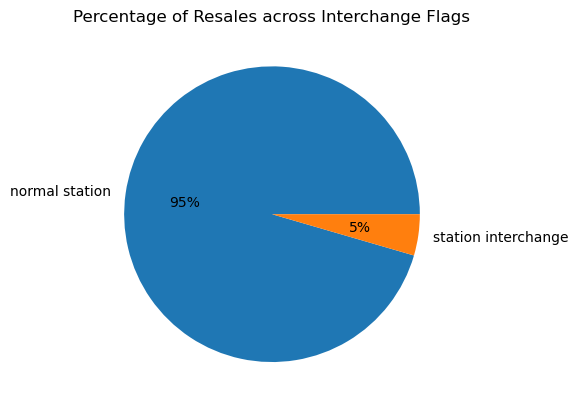

In [29]:
pie_interchange_flag = interchange_flag_count.plot.pie(y='count', ylabel='', legend=False, autopct='%.0f%%')
pie_interchange_flag.set(title='Percentage of Resales across Interchange Flags')

In [30]:
# Export 'pie_interchange_flag'
pie_interchange_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_interchange_flag.png'), 
                                    bbox_inches='tight')

<b><u>Interpretation: </u></b><br>
95% of the flats have normal station as their nearest train station, only 5% of the flats have station interchange as their nearest train station. 

### 03.2 Which flag has higher resale price in average

In [31]:
interchange_flag_adj_resale_price_mean = flat_resale.groupby('interchange_flag').agg(adjusted_resale_price_mean=('adjusted_resale_price', 'mean'))
interchange_flag_adj_resale_price_mean.sort_values('adjusted_resale_price_mean', ascending=False, inplace=True)
interchange_flag_adj_resale_price_mean

,adjusted_resale_price_mean
interchange_flag,
station interchange,464916.486352
normal station,364485.656032


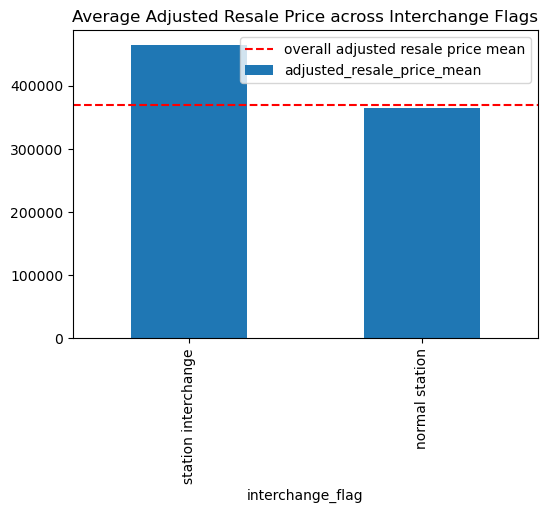

In [32]:
bar_price_vs_interchange_flag = interchange_flag_adj_resale_price_mean.plot.bar(figsize=(6, 4))
plt.axhline(y=flat_resale['adjusted_resale_price'].mean(), color='red', linestyle='--', 
            label='overall adjusted resale price mean')
plt.title('Average Adjusted Resale Price across Interchange Flags')
plt.legend()

In [33]:
# Export 'bar_price_vs_interchange_flag'
bar_price_vs_interchange_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_vs_interchange_flag.png'), 
                                             bbox_inches='tight')

<b><u>Interpretation: </u></b><br>
Although there is only 5% of the flats have station interchange as their nearest train station, their average adjusted resale price is higher than the overall market average and those with normal station as the nearest station. This could due to the convenience of station interchange that brings commuters to different train travel lines. 

# 06. Takeaway

<b>Flat Type</b><br>
- 4 room and 3 room are the top 2 most common flat types in the resale market. 
- The average adjusted resale price of 4-room flats matches the overall market average, while 3-room flats are below the market average. 
- Multi-generation and executive flat types have the highest average adjusted resale price. 
- Besides, the floor area of flat types also affect their adjusted resale price. Multi-generation flat has the highest floor area, followed by executive, 5 room, 4 room, 3 room, 2 room and 1 room. On the other hand, the average adjusted resale price of the flat types also behave in the same way. This aligns with the hypothesis which the larger floor area comes with higher adjusted resale price.

<b>Flat Model</b><br>
- Model A, Improved, and New Generation are the top 3 most common flat models in resale market. 
- Model A and Improved models have their average adjusted resale price around the market average, while New Generation model is below the market average. 
- Type S1, Type S2 and premium apartment loft have the highest average adjusted resale price. 
- The hypothesis about floor area and adjusted resale price also applies here, but with a few model exceptions. For example, the top four highest average adjusted resale price models do not have the largest floor area. This could due to the transactions of these models happened only in more recent years, at the same time the overall market price has increased over the years. Therefore, the average adjusted resale price of these models would be higher even without the larger floor area. 

<b>Interchange Flag</b><br>
- 95% of the flats have normal station as their nearest train station, while the remaining 5% of the flats have station interchange as their nearest train station. 
- However, the average adjusted resale price of these 5% of the flats is higher than the overall market average and higher those 95% of flats. This could due to the convenience of station interchange that brings commuters to different train travel lines. 